In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
def scatter_plot(x_data_input, y_data_input, x_label, y_label, figure_label):
    '''
    :param x_data_input: x - axis
    :param y_data_input: y- axis
    :param x_label: x-label
    :param y_label: y-label
    :param figure_label: figure name
    :return: N/A
    '''
    plt.scatter(x_data_input, y_data_input)
    plt.title(figure_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

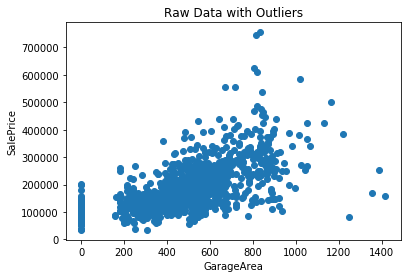

In [3]:
df = pd.read_csv('Python_Lesson5/train.csv')
x_data = df["GarageArea"]
y_data = df["SalePrice"]
scatter_plot(x_data, y_data, 'GarageArea', 'SalePrice', 'Raw Data with Outliers')

printing outlier Garage Area
178     1166
581     1390
664     1134
825     1220
1061    1248
1190    1356
1298    1418
Name: GarageArea, dtype: int64


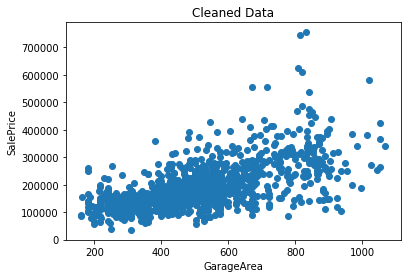

In [7]:
# Cleaning data with z-score.
outlier_data = data[np.abs(stats.zscore(data['GarageArea']) > 3)]

# print outliner sales price
print('printing outlier Garage Area')
print(outlier_data['GarageArea'])
cleaned_data = data[np.abs(stats.zscore(data['GarageArea']) < 3)]
cleaned_data = cleaned_data[np.abs(stats.zscore(cleaned_data['GarageArea']) > -2)]

# Plot the cleaned data to see there are no outlier data.
x_data = cleaned_data["GarageArea"]
y_data = cleaned_data["SalePrice"]
scatter_plot(x_data, y_data, 'GarageArea', 'SalePrice', 'Cleaned Data')

RMSE is: 
 0.02339090530416285


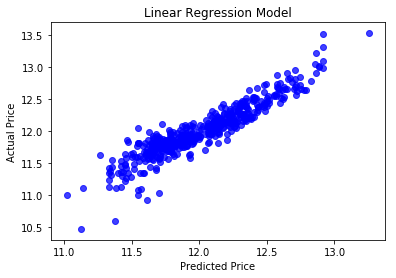

In [5]:
# looking for null values and alphabets
cleaned_data = df.select_dtypes(include=[np.number]).interpolate().dropna()

# estimating with clean data.
x_cleaned = cleaned_data.drop(['SalePrice', 'Id'], axis=1)
# ask why log algorithm.
y_cleaned = np.log(cleaned_data.SalePrice)
# y_cleaned = cleaned_data.SalePrice
train_features, test_features, train_results, test_results_actuals = train_test_split(x_cleaned, y_cleaned, random_state=42, test_size=.33)

linear_regression = LinearRegression()
model = linear_regression.fit(train_features, train_results)
test_results_predicted = model.predict(test_features)
print('RMSE is: \n', mean_squared_error(test_results_actuals, test_results_predicted))

plt.scatter(test_results_predicted, test_results_actuals, alpha=.75, color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

RMSE is: 
 0.016103579694740675


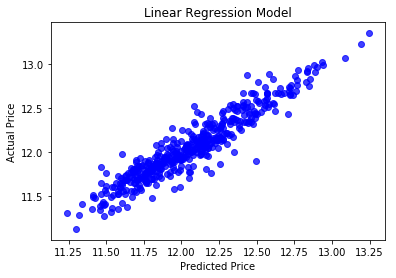

In [11]:
# looking for null values and alphabets
cleaned_data = cleaned_data.select_dtypes(include=[np.number]).interpolate().dropna()

# estimating with clean data.
x_cleaned = cleaned_data.drop(['SalePrice', 'Id'], axis=1)
# ask why log algorithm.
y_cleaned = np.log(cleaned_data.SalePrice)
# y_cleaned = cleaned_data.SalePrice
train_features, test_features, train_results, test_results_actuals = train_test_split(x_cleaned, y_cleaned, random_state=42, test_size=.33)

linear_regression = LinearRegression()
model = linear_regression.fit(train_features, train_results)
test_results_predicted = model.predict(test_features)
print('RMSE is: \n', mean_squared_error(test_results_actuals, test_results_predicted))

plt.scatter(test_results_predicted, test_results_actuals, alpha=.75, color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()